In [217]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N=1009
label=9

In [218]:
plt.rcParams['figure.figsize']=(3,3)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'
import sys
caffe_root='/home/dagui/caffe-master/'
sys.path.insert(0,caffe_root+'python')
import caffe
import os

In [219]:
caffe.set_device(0)
caffe.set_mode_gpu()

In [220]:
model_def='/home/dagui/cdg/mnist/1_deploy.prototxt'
model_weights='/home/dagui/cdg/mnist/1__iter_10000.caffemodel'
net=caffe.Net(model_def,model_weights,caffe.TEST)

In [221]:
image=np.zeros((N,28,28,1))
for i in range(N):
    image[i]=caffe.io.load_image(('/home/dagui/cdg/mnist/testimage/pic2/'+str(label)+'/'+str(i+1)+'.bmp'),color=False)

In [222]:
transformer_image=np.zeros((N,1,28,28))
transformer=caffe.io.Transformer({'data':net.blobs['data'].data.shape})
transformer.set_transpose('data',(2,0,1))
transformer.set_raw_scale('data',255)
for i in range(N):
    transformer_image[i]=transformer.preprocess('data',image[i])

In [223]:
net.blobs['data'].reshape(N,1,28,28)

In [224]:
net.blobs['data'].data[...]=transformer_image
output=net.forward()
output_prob=output['loss']
predict=output_prob.argmax(axis=1)
predict.shape
image.shape

(1009, 28, 28, 1)

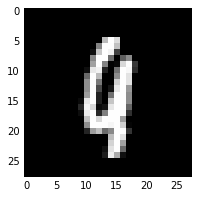

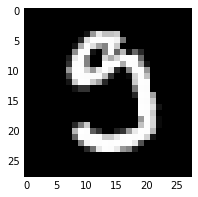

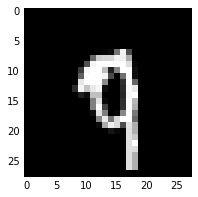

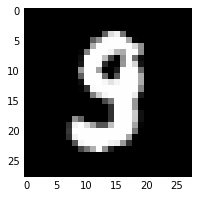

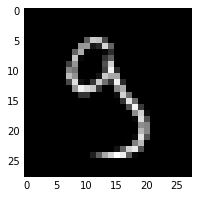

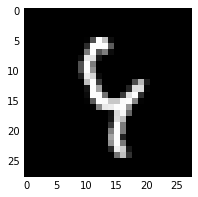

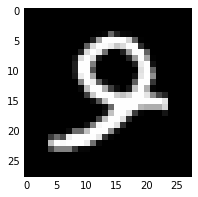

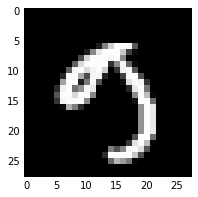

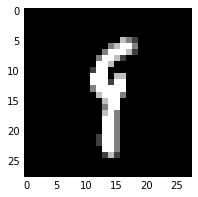

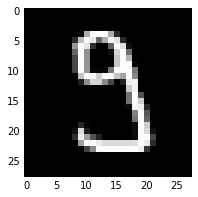

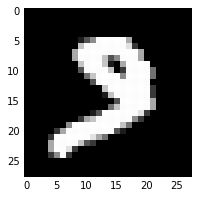

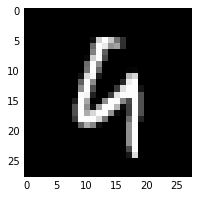

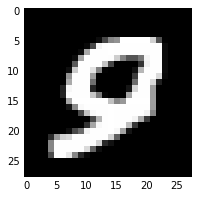

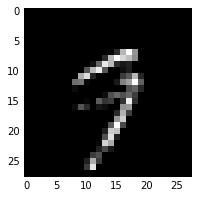

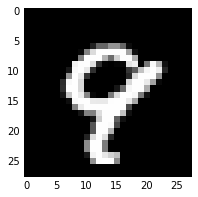

In [225]:
for i in range(N):
    if (predict[i] != label):
        plt.figure()
        plt.imshow(image[i,:,:,0])
        fname=str(label)+'--->'+str(predict[i])+'('+str(i+1)+')'
        plt.savefig(('/home/dagui/cdg/mnist/fault/'+fname))

In [226]:
def vis_square(data):
    data=(data-data.min())/(data.max()-data.min())
    n=int(np.ceil(np.sqrt(data.shape[0])))
    padding=(((0,n**2-data.shape[0]),(0,1),(0,1))+((0,0),)*(data.ndim-3))
    data=np.pad(data,padding,mode='constant',constant_values=1)
    data=data.reshape((n,n)+data.shape[1:]).transpose((0,2,1,3)+tuple(range(4,data.ndim+1)))
    data=data.reshape((n*data.shape[1],n*data.shape[3])+data.shape[4:])
    plt.imshow(data);plt.axis('off')

In [228]:
[(k,v[0].data.shape) for k,v in net.params.items()]

[('conv1', (20, 1, 5, 5)),
 ('conv2', (50, 20, 5, 5)),
 ('fc1', (500, 800)),
 ('score', (10, 500))]